### 2.3 선형회귀 구현

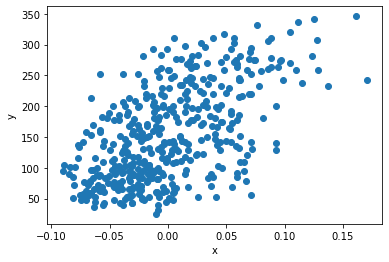

In [9]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt
# print(diabetes)
# print(type(diabetes))
# print(diabetes['data'].shape)

# print(type(diabetes.data))
# print(diabetes.data.shape)
# print(diabetes.target.shape)
x = diabetes.data[:, 2]   # x*w+b
# print(x)
# print(x.shape)
y = diabetes.target

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
a = [1,2,3,4,5]
b = [4,5,6,7,8]
for i in range(5):
    print(a[i], b[i]) 

1 4
2 5
3 6
4 7
5 8


In [11]:
a = [1,2,3,4,5]
b = [4,5,6,5,8]
for a_i, b_i in zip(a, b):
    print(a_i, b_i) 

1 4
2 5
3 6
4 5
5 8


(442,)
(442,)
w= 9.819118656206367
b= 151.35590713560302


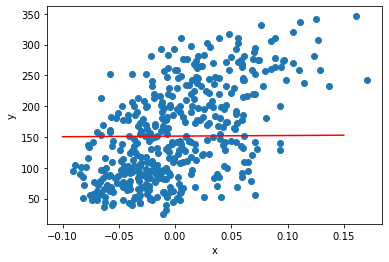

In [12]:
w = 1.0
b = 1.0
rate = 0.01
print(x.shape)
print(y.shape)
for x_i, y_i in zip(x, y):  # epoch 1 번
    y_hat = x_i * w + b
    err = y_hat - y_i
    w = w - rate * err * x_i
    b = b - rate * err

print('w=', w)
print('b=', b)
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

w= 942.7013592248312
b= 151.74608061033615


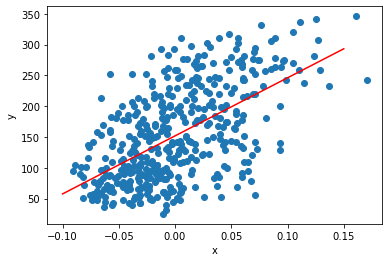

In [13]:
rate = 0.01
w = 1.0
b = 1.0
for i in range(1000):  # epoch 1000 번
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_hat - y_i 

        w = w - rate * err * x_i
        b = b - rate * err

print('w=', w)
print('b=', b)        
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

w =  941.8926096848675
b =  151.74729476062117
321.28796450389734


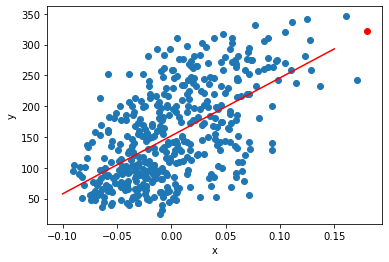

In [17]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=700, rate=0.01):   # (m,10)
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트
#             print(self.w)
                
neuron = Neuron()
neuron.fit(x, y)

print("w = ",neuron.w )
print("b = ",neuron.b )
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]],'r')

print(0.18 * neuron.w + neuron.b )
plt.plot(0.18, 0.18 * neuron.w + neuron.b, 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 케라스를 이용한 선형회귀

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))   #  (1,1)(1,1)+(1,)
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

model.fit(x, y, batch_size=1, epochs=700)

Epoch 1/700
442/442 [==============================] - 0s 467us/step - loss: 7308.1885 - mse: 7308.1885
Epoch 2/700
442/442 [==============================] - 0s 462us/step - loss: 5903.4658 - mse: 5903.4658
Epoch 3/700
442/442 [==============================] - 0s 470us/step - loss: 5791.2314 - mse: 5791.2314
Epoch 4/700
442/442 [==============================] - 0s 478us/step - loss: 5716.7417 - mse: 5716.7417
Epoch 5/700
442/442 [==============================] - 0s 478us/step - loss: 5672.2314 - mse: 5672.2314
Epoch 6/700
442/442 [==============================] - 0s 466us/step - loss: 5597.9224 - mse: 5597.9224
Epoch 7/700
442/442 [==============================] - 0s 476us/step - loss: 5519.5586 - mse: 5519.5586
Epoch 8/700
442/442 [==============================] - 0s 454us/step - loss: 5461.5850 - mse: 5461.5850
Epoch 9/700
442/442 [==============================] - 0s 463us/step - loss: 5408.4561 - mse: 5408.4561
Epoch 10/700
442/442 [==============================] - 0s 443us

442/442 [==============================] - 0s 438us/step - loss: 4015.0146 - mse: 4015.0146
Epoch 80/700
442/442 [==============================] - 0s 438us/step - loss: 4021.2517 - mse: 4021.2517
Epoch 81/700
442/442 [==============================] - 0s 474us/step - loss: 4007.2256 - mse: 4007.2256
Epoch 82/700
442/442 [==============================] - 0s 476us/step - loss: 4005.8887 - mse: 4005.8887
Epoch 83/700
442/442 [==============================] - 0s 461us/step - loss: 4031.0840 - mse: 4031.0840
Epoch 84/700
442/442 [==============================] - 0s 463us/step - loss: 4004.7542 - mse: 4004.7542
Epoch 85/700
442/442 [==============================] - 0s 441us/step - loss: 4016.9375 - mse: 4016.9375
Epoch 86/700
442/442 [==============================] - 0s 471us/step - loss: 3965.9209 - mse: 3965.9209
Epoch 87/700
442/442 [==============================] - 0s 448us/step - loss: 4021.3127 - mse: 4021.3127
Epoch 88/700
442/442 [==============================] - 0s 472us/ste

442/442 [==============================] - 0s 418us/step - loss: 3928.5859 - mse: 3928.5859
Epoch 157/700
442/442 [==============================] - 0s 410us/step - loss: 3952.1912 - mse: 3952.1912
Epoch 158/700
442/442 [==============================] - 0s 416us/step - loss: 3946.6057 - mse: 3946.6057
Epoch 159/700
442/442 [==============================] - 0s 406us/step - loss: 3940.5779 - mse: 3940.5779
Epoch 160/700
442/442 [==============================] - 0s 399us/step - loss: 3924.8381 - mse: 3924.8381
Epoch 161/700
442/442 [==============================] - 0s 411us/step - loss: 3946.7197 - mse: 3946.7197
Epoch 162/700
442/442 [==============================] - 0s 412us/step - loss: 3951.2219 - mse: 3951.2219
Epoch 163/700
442/442 [==============================] - 0s 435us/step - loss: 3936.3694 - mse: 3936.3694
Epoch 164/700
442/442 [==============================] - 0s 410us/step - loss: 3963.0596 - mse: 3963.0596
Epoch 165/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 416us/step - loss: 3953.5999 - mse: 3953.5999
Epoch 234/700
442/442 [==============================] - 0s 438us/step - loss: 3896.9788 - mse: 3896.9788
Epoch 235/700
442/442 [==============================] - 0s 465us/step - loss: 3959.0425 - mse: 3959.0425
Epoch 236/700
442/442 [==============================] - 0s 463us/step - loss: 3950.7451 - mse: 3950.7451
Epoch 237/700
442/442 [==============================] - 0s 474us/step - loss: 3932.9968 - mse: 3932.9968
Epoch 238/700
442/442 [==============================] - 0s 427us/step - loss: 3949.0842 - mse: 3949.0842
Epoch 239/700
442/442 [==============================] - 0s 464us/step - loss: 3944.2522 - mse: 3944.2522
Epoch 240/700
442/442 [==============================] - 0s 465us/step - loss: 3948.3167 - mse: 3948.3167
Epoch 241/700
442/442 [==============================] - 0s 454us/step - loss: 3945.7585 - mse: 3945.7585
Epoch 242/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 489us/step - loss: 3951.7905 - mse: 3951.7905
Epoch 311/700
442/442 [==============================] - 0s 472us/step - loss: 3934.1560 - mse: 3934.1560
Epoch 312/700
442/442 [==============================] - 0s 458us/step - loss: 3948.8572 - mse: 3948.8572
Epoch 313/700
442/442 [==============================] - 0s 409us/step - loss: 3955.1355 - mse: 3955.1355
Epoch 314/700
442/442 [==============================] - 0s 472us/step - loss: 3917.0496 - mse: 3917.0496
Epoch 315/700
442/442 [==============================] - 0s 476us/step - loss: 3954.5193 - mse: 3954.5193
Epoch 316/700
442/442 [==============================] - 0s 469us/step - loss: 3957.3201 - mse: 3957.3201
Epoch 317/700
442/442 [==============================] - 0s 485us/step - loss: 3912.0132 - mse: 3912.0132
Epoch 318/700
442/442 [==============================] - 0s 465us/step - loss: 3936.4541 - mse: 3936.4541
Epoch 319/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 485us/step - loss: 3917.0977 - mse: 3917.0977
Epoch 388/700
442/442 [==============================] - 0s 495us/step - loss: 3943.9878 - mse: 3943.9878
Epoch 389/700
442/442 [==============================] - 0s 470us/step - loss: 3933.1108 - mse: 3933.1108
Epoch 390/700
442/442 [==============================] - 0s 489us/step - loss: 3941.8198 - mse: 3941.8198
Epoch 391/700
442/442 [==============================] - 0s 467us/step - loss: 3929.2607 - mse: 3929.2607
Epoch 392/700
442/442 [==============================] - 0s 483us/step - loss: 3915.7002 - mse: 3915.7002
Epoch 393/700
442/442 [==============================] - 0s 483us/step - loss: 3937.7231 - mse: 3937.7231
Epoch 394/700
442/442 [==============================] - 0s 467us/step - loss: 3953.8486 - mse: 3953.8486
Epoch 395/700
442/442 [==============================] - 0s 458us/step - loss: 3944.8416 - mse: 3944.8416
Epoch 396/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 418us/step - loss: 3952.2542 - mse: 3952.2542
Epoch 465/700
442/442 [==============================] - 0s 418us/step - loss: 3906.9404 - mse: 3906.9404
Epoch 466/700
442/442 [==============================] - 0s 430us/step - loss: 3952.8066 - mse: 3952.8066
Epoch 467/700
442/442 [==============================] - 0s 456us/step - loss: 3909.7344 - mse: 3909.7344
Epoch 468/700
442/442 [==============================] - 0s 484us/step - loss: 3954.7632 - mse: 3954.7632
Epoch 469/700
442/442 [==============================] - 0s 489us/step - loss: 3917.4358 - mse: 3917.4358
Epoch 470/700
442/442 [==============================] - 0s 498us/step - loss: 3950.4736 - mse: 3950.4736
Epoch 471/700
442/442 [==============================] - 0s 494us/step - loss: 3930.5850 - mse: 3930.5850
Epoch 472/700
442/442 [==============================] - 0s 492us/step - loss: 3938.6440 - mse: 3938.6440
Epoch 473/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 476us/step - loss: 3943.7373 - mse: 3943.7373
Epoch 542/700
442/442 [==============================] - 0s 485us/step - loss: 3933.4165 - mse: 3933.4165
Epoch 543/700
442/442 [==============================] - 0s 493us/step - loss: 3957.4780 - mse: 3957.4780
Epoch 544/700
442/442 [==============================] - 0s 485us/step - loss: 3940.2427 - mse: 3940.2427
Epoch 545/700
442/442 [==============================] - 0s 500us/step - loss: 3949.4370 - mse: 3949.4370
Epoch 546/700
442/442 [==============================] - 0s 487us/step - loss: 3948.7512 - mse: 3948.7512
Epoch 547/700
442/442 [==============================] - 0s 500us/step - loss: 3953.3645 - mse: 3953.3645
Epoch 548/700
442/442 [==============================] - 0s 492us/step - loss: 3936.2480 - mse: 3936.2480
Epoch 549/700
442/442 [==============================] - 0s 472us/step - loss: 3949.3262 - mse: 3949.3262
Epoch 550/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 474us/step - loss: 3943.1101 - mse: 3943.1101
Epoch 619/700
442/442 [==============================] - 0s 483us/step - loss: 3939.6548 - mse: 3939.6548
Epoch 620/700
442/442 [==============================] - 0s 467us/step - loss: 3956.5195 - mse: 3956.5195
Epoch 621/700
442/442 [==============================] - 0s 476us/step - loss: 3900.5361 - mse: 3900.5361
Epoch 622/700
442/442 [==============================] - 0s 475us/step - loss: 3924.5391 - mse: 3924.5391
Epoch 623/700
442/442 [==============================] - 0s 468us/step - loss: 3940.6177 - mse: 3940.6177
Epoch 624/700
442/442 [==============================] - 0s 482us/step - loss: 3952.2642 - mse: 3952.2642
Epoch 625/700
442/442 [==============================] - 0s 480us/step - loss: 3949.5918 - mse: 3949.5918
Epoch 626/700
442/442 [==============================] - 0s 483us/step - loss: 3949.0210 - mse: 3949.0210
Epoch 627/700
442/442 [==============================] - 0s 

442/442 [==============================] - 0s 483us/step - loss: 3948.2751 - mse: 3948.2751
Epoch 696/700
442/442 [==============================] - 0s 467us/step - loss: 3942.9221 - mse: 3942.9221
Epoch 697/700
442/442 [==============================] - 0s 485us/step - loss: 3943.8967 - mse: 3943.8967
Epoch 698/700
442/442 [==============================] - 0s 496us/step - loss: 3951.0310 - mse: 3951.0310
Epoch 699/700
442/442 [==============================] - 0s 514us/step - loss: 3924.0315 - mse: 3924.0315
Epoch 700/700
442/442 [==============================] - 0s 466us/step - loss: 3961.3105 - mse: 3961.3105


w =  948.8069
b =  150.71626
321.5015020751953


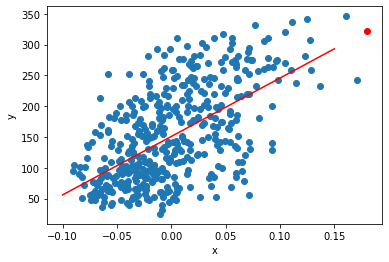

In [21]:
# print(model.weights)
w = model.weights[0].numpy()[0,0]
b = model.weights[1].numpy()[0]

print("w = ", w )
print("b = ", b )
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]],'r')

print(0.18 * w + b )
plt.plot(0.18, 0.18 * w + b, 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.show()